# Tarefa 02

#### 1. Cite 5 diferenças entre o AdaBoost e o GBM.
#### 2. Acesse o link [Scikit-learn– GBM](https://scikit-learn.org/stable/modules/ensemble.html), leia a explicação (traduza se for preciso) e crie um jupyter notebook contendo o exemplo de classificação e de regressão do GBM.
#### 3. Cite 5 Hyperparametros importantes no GBM.
#### 4. (Opcional) Utilize o GridSearch para encontrar os melhores hyperparametros para o conjunto de dados do exemplo.
#### 5. Acessando o artigo do Jerome Friedman ([Stochastic](https://jerryfriedman.su.domains/ftp/stobst.pdf)) e pensando no nome dado ao Stochastic GBM, qual é a maior diferença entre os dois algoritmos?

----------------------------------------
#### 1. Cite 5 diferenças entre o AdaBoost e o GBM.

| Descrição            | AdaBoost                                         | GBM  |
| ---------------------------- |:-------------------------------------------:| -----------------------:|
| Profundidade da árvore| Profundidade igual a 1 |Pode variar em profundidade|
| Primeiro passo| um stump |a média do Y|
| Peso das respostas| Cada resposta tem um peso diferente |Pesos iguais: um multiplicador em comum chamado learning_rate(eta)|
| Eficiência Computacional| baixo uso de memória |moderado uso de memória|
| Outliers e Ruídos|Pode ser mais sensível se o peso maior for para os Outliers e Ruídos  | Menos sensível pois é baseado em resíduos  |


#### 2. Acesse o link [Scikit-learn– GBM](https://scikit-learn.org/stable/modules/ensemble.html), leia a explicação (traduza se for preciso) e crie um jupyter notebook contendo o exemplo de classificação e de regressão do GBM.

##### 2.1. Exemplo de Classificação do GBM.

In [1]:
# Importando as bibliotecas
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import make_hastie_10_2
from sklearn.ensemble import HistGradientBoostingClassifier

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [2]:
# Separando as variáveis explicativas da variável resposta
X, y = make_hastie_10_2(random_state=0)

In [3]:
# Visualizando valores de X
pd.DataFrame(X).head()

,0,1,2,3,4,5,6,7,8,9
0,1.764052,0.400157,0.978738,2.240893,1.867558,-0.977278,0.950088,-0.151357,-0.103219,0.410599
1,0.144044,1.454274,0.761038,0.121675,0.443863,0.333674,1.494079,-0.205158,0.313068,-0.854096
2,-2.552990,0.653619,0.864436,-0.742165,2.269755,-1.454366,0.045759,-0.187184,1.532779,1.469359
3,0.154947,0.378163,-0.887786,-1.980796,-0.347912,0.156349,1.230291,1.202380,-0.387327,-0.302303
4,-1.048553,-1.420018,-1.706270,1.950775,-0.509652,-0.438074,-1.252795,0.777490,-1.613898,-0.212740


In [4]:
# Visualizando valores de y
pd.DataFrame(y).head()

,0
0,1.0
1,-1.0
2,1.0
3,-1.0
4,1.0


In [5]:
# Visualizando as possibilidades de 'y'
pd.DataFrame(y).value_counts()

-1.0    6068
 1.0    5932
Name: count, dtype: int64

In [6]:
# Separando as amostras de treino e teste
X_train, X_test = X[:2000], X[2000:]
y_train, y_test = y[:2000], y[2000:]

In [7]:
# Criando o classificador Hist GBM
clf1 = HistGradientBoostingClassifier(max_iter=100)

In [8]:
# Treinando os modelos com os dados separados para treinamento
clf1.fit(X_train, y_train)

HistGradientBoostingClassifier()

In [9]:
# Avaliando o modelo
clf1.score(X_test, y_test)

0.8965

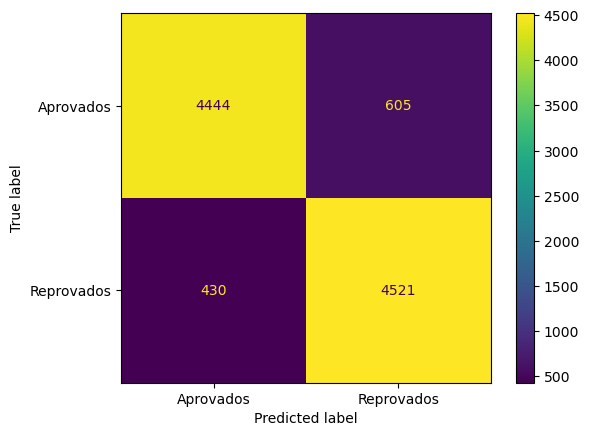

In [10]:
# Visualizando a matriz de classificação
predictions = clf1.predict(X_test)
cm = confusion_matrix(y_test, predictions, labels=clf1.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Aprovados', 'Reprovados'])
disp.plot()

##### 2.2. Exemplo de Regressão do GBM.

In [11]:
# Importando as bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_friedman1
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.metrics import mean_squared_error, confusion_matrix, ConfusionMatrixDisplay

In [12]:
# Separando as variáveis explicativas da variável resposta
X, y = make_friedman1(n_samples=1200, random_state=0, noise=1.0)

In [13]:
# Visualizando valores de X
pd.DataFrame(X).head()

,0,1,2,3,4,5,6,7,8,9
0,0.548814,0.715189,0.602763,0.544883,0.423655,0.645894,0.437587,0.891773,0.963663,0.383442
1,0.791725,0.528895,0.568045,0.925597,0.071036,0.087129,0.020218,0.832620,0.778157,0.870012
2,0.978618,0.799159,0.461479,0.780529,0.118274,0.639921,0.143353,0.944669,0.521848,0.414662
3,0.264556,0.774234,0.456150,0.568434,0.018790,0.617635,0.612096,0.616934,0.943748,0.681820
4,0.359508,0.437032,0.697631,0.060225,0.666767,0.670638,0.210383,0.128926,0.315428,0.363711


In [14]:
# Visualizando valores de y
pd.DataFrame(y).head()

,0
0,18.406315
1,19.606778
2,14.744078
3,9.448951
4,9.214961


In [15]:
# Separando as amostras de treino e teste
X_train, X_test = X[:200], X[200:]
y_train, y_test = y[:200], y[200:]

In [16]:
# Criando o classificador GBM
est = GradientBoostingRegressor(
     n_estimators=100, learning_rate=0.1, max_depth=1, random_state=0,
     loss='squared_error'
 )

In [17]:
# Treinando os modelos com os dados separados para treinamento
est.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=1, random_state=0)

In [18]:
# Calculando o MSE da base de teste
mean_squared_error(y_test, est.predict(X_test))

5.009154859960321

In [19]:
# Calculando o R_quadrado na base de teste
est.score(X_test, y_test)

0.8058912110043196

#### 3. Cite 5 Hyperparametros importantes no GBM.

1. max_depth: profundidade máxima da árvore;
2. learning_rate: taxa de aprendizado que controla a contribuição  de cada árvore para a correção dos erros;
3. n_estimators: O número máximo de estimadores em que o aumento é encerrado;
4. min_samples_leaf: quantidade mínima de uma amostra para que um nó vire folha; e
5. min_weight_fraction_leaf: semelhante ao anterior, mas define uma fração do número total de observações em vez de um inteiro.

#### 4. (Opcional) Utilize o GridSearch para encontrar os melhores hyperparametros para o conjunto de dados do exemplo.

##### 4.1. Exemplo de Classificação do GBM.

In [20]:
# Importando as bibliotecas
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_hastie_10_2
from sklearn.ensemble import HistGradientBoostingClassifier

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [21]:
# Separando as variáveis explicativas da variável resposta
X, y = make_hastie_10_2(random_state=0)

In [22]:
# Visualizando valores de X
pd.DataFrame(X).head()

,0,1,2,3,4,5,6,7,8,9
0,1.764052,0.400157,0.978738,2.240893,1.867558,-0.977278,0.950088,-0.151357,-0.103219,0.410599
1,0.144044,1.454274,0.761038,0.121675,0.443863,0.333674,1.494079,-0.205158,0.313068,-0.854096
2,-2.552990,0.653619,0.864436,-0.742165,2.269755,-1.454366,0.045759,-0.187184,1.532779,1.469359
3,0.154947,0.378163,-0.887786,-1.980796,-0.347912,0.156349,1.230291,1.202380,-0.387327,-0.302303
4,-1.048553,-1.420018,-1.706270,1.950775,-0.509652,-0.438074,-1.252795,0.777490,-1.613898,-0.212740


In [23]:
# Visualizando valores de y
pd.DataFrame(y).head()

,0
0,1.0
1,-1.0
2,1.0
3,-1.0
4,1.0


In [24]:
# Visualizando as possibilidades de 'y'
pd.DataFrame(y).value_counts()

-1.0    6068
 1.0    5932
Name: count, dtype: int64

In [25]:
# Separando as amostras de treino e teste
X_train, X_test = X[:2000], X[2000:]
y_train, y_test = y[:2000], y[2000:]

In [26]:
# Definindo os parâmetros para teste
parametros = {'max_iter': [10, 50, 100, 150, 200]}

In [27]:
# Criando o classificador Hist GBM
clf2 = HistGradientBoostingClassifier()

In [28]:
# Criando o objeto GridSearchCV
grid_parametros = GridSearchCV(clf2, parametros)

In [29]:
# Buscando o melhor parâmatro
grid_parametros.fit(X_train,y_train)

GridSearchCV(estimator=HistGradientBoostingClassifier(),
             param_grid={'max_iter': [10, 50, 100, 150, 200]})

In [30]:
# Visualizando o melhor parâmetro
melhor_parametro = grid_parametros.best_params_
melhor_parametro

{'max_iter': 200}

In [31]:
# Criando o classificador GBM para o melhor parâmetro
clf3 = HistGradientBoostingClassifier(max_iter=200)

In [32]:
# Treinando os modelos com os dados separados para treinamento
clf3.fit(X_train, y_train)

HistGradientBoostingClassifier(max_iter=200)

In [33]:
# Avaliando o modelo
clf3.score(X_test, y_test)

0.9076

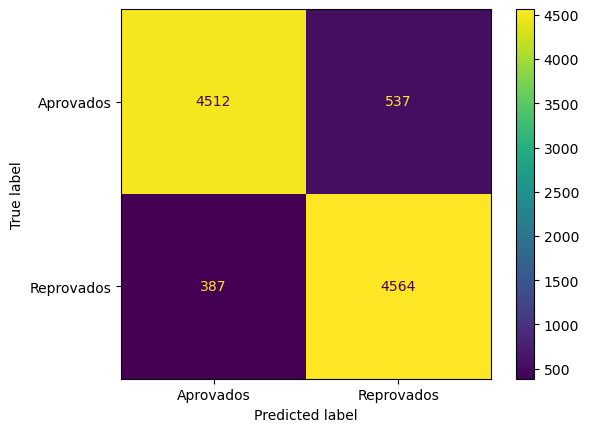

In [34]:
# Visualizando a matriz de classificação
predictions = clf3.predict(X_test)
cm = confusion_matrix(y_test, predictions, labels=clf3.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Aprovados', 'Reprovados'])
disp.plot()

##### 4.2. Exemplo de Regressão do GBM.

In [35]:
# Importando as bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_friedman1
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.metrics import mean_squared_error, confusion_matrix, ConfusionMatrixDisplay

In [36]:
# Separando as variáveis explicativas da variável resposta
X, y = make_friedman1(n_samples=1200, random_state=0, noise=1.0)

In [37]:
# Visualizando valores de X
pd.DataFrame(X).head()

,0,1,2,3,4,5,6,7,8,9
0,0.548814,0.715189,0.602763,0.544883,0.423655,0.645894,0.437587,0.891773,0.963663,0.383442
1,0.791725,0.528895,0.568045,0.925597,0.071036,0.087129,0.020218,0.832620,0.778157,0.870012
2,0.978618,0.799159,0.461479,0.780529,0.118274,0.639921,0.143353,0.944669,0.521848,0.414662
3,0.264556,0.774234,0.456150,0.568434,0.018790,0.617635,0.612096,0.616934,0.943748,0.681820
4,0.359508,0.437032,0.697631,0.060225,0.666767,0.670638,0.210383,0.128926,0.315428,0.363711


In [38]:
# Visualizando valores de y
pd.DataFrame(y).head()

,0
0,18.406315
1,19.606778
2,14.744078
3,9.448951
4,9.214961


In [39]:
# Separando as amostras de treino e teste
X_train, X_test = X[:200], X[200:]
y_train, y_test = y[:200], y[200:]

In [40]:
# Definindo os parâmetros para teste
parametros = {'n_estimators': [10, 50, 100, 150, 200]}

In [41]:
# Criando o classificador GBM
est1 = GradientBoostingRegressor(
     learning_rate=0.1, max_depth=1, random_state=0,
     loss='squared_error'
 )

In [42]:
# Criando o objeto GridSearchCV
grid_parametros = GridSearchCV(est1, parametros)

In [43]:
# Buscando o melhor parâmatro
grid_parametros.fit(X_train,y_train)

GridSearchCV(estimator=GradientBoostingRegressor(max_depth=1, random_state=0),
             param_grid={'n_estimators': [10, 50, 100, 150, 200]})

In [44]:
# Visualizando o melhor parâmetro
melhor_parametro = grid_parametros.best_params_
melhor_parametro

{'n_estimators': 200}

In [45]:
# Criando o classificador GBM para o melhor parâmetro
est2 = GradientBoostingRegressor(
     n_estimators=200, learning_rate=0.1, max_depth=1, random_state=0,
     loss='squared_error'
 )

In [46]:
# Treinando os modelos com os dados separados para treinamento
est2.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=1, n_estimators=200, random_state=0)

In [47]:
# Calculando o MSE da base de teste
mean_squared_error(y_test, est2.predict(X_test))

3.840234741105356

In [48]:
# Calculando o R_quadrado na base de teste
est2.score(X_test, y_test)

0.8511878079447107

#### 5. Acessando o artigo do Jerome Friedman ([Stochastic](https://jerryfriedman.su.domains/ftp/stobst.pdf)) e pensando no nome dado ao Stochastic GBM, qual é a maior diferença entre os dois algoritmos?

A maior diferença entre os dois algoritmos está na melhora da precisão, em função do aumento da aleatoriedade através da seleção de amostras menores em cada iteração. O Stochastic GBM pode ser visto nesse sentido como um híbrido entre boosting e bagging